In [2]:
#import pandas and other libraries
import pandas as pd
import matplotlib
import numpy as np
import json
from pprint import pprint
import matplotlib.pyplot as plt
from pymongo import MongoClient


In [3]:
# Create an instance of MongoClient
mongo = MongoClient(port=27017)

['NFL',
 'admin',
 'autosaurus',
 'config',
 'epa',
 'gardenDB',
 'local',
 'marketing',
 'rop',
 'uk_food']

In [4]:
mongo.list_database_names()



['NFL',
 'admin',
 'autosaurus',
 'config',
 'epa',
 'gardenDB',
 'local',
 'marketing',
 'rop',
 'uk_food']

In [5]:
nfl = mongo['NFL']
nfl.list_collection_names()
details = nfl['playerDets']

In [6]:
#load json file
with open('nflData.json') as f:
    data = json.load(f)

In [40]:
#load json file
with open('nflData.json') as f:
    data = json.load(f)
# Insert the data into the collection
if isinstance(data, list):
    # If your JSON is an array of objects
    details.insert_many(data)
else:
    # If your JSON is a single object
    details.insert_one(data)  
players = details.find()  


In [39]:
details.delete_many({})

DeleteResult({'n': 370, 'ok': 1.0}, acknowledged=True)

In [41]:
for player in players:
    print(player)

{'_id': ObjectId('67573fa96c21cf285a54524e'), 'player_id': 9265, 'name': 'Matthew Stafford', 'status': 'Q', 'position_type': 'O', 'eligible_positions': ['QB'], 'percent_owned': 64, 'season': [{'player_id': 9265, 'name': 'Matthew Stafford', 'position_type': 'O', 'Pass Yds': 2983.0, 'Pass TD': 17.0, 'Int': 7.0, 'Sack': 28.0, 'Rush Att': 17.0, 'Rush Yds': 11.0, 'Rush TD': 0.0, 'Rec': 0.0, 'Rec Yds': 0.0, 'Rec TD': 0.0, 'Ret Yds': 0.0, 'Ret TD': 0.0, '2-PT': 0.0, 'Fum': 6.0, 'Fum Lost': 2.0, 'Fum Ret TD': 0.0, 'Pick Six': 0.0, '40 Yd Comp': 5.0, '40 Yd Pass TD': 1.0, '40 Yd Rush': 0.0, '40 Yd Rush TD': 0.0, '40 Yd Rec': 0.0, '40 Yd Rec TD': 0.0, 'Targets': 0.0, 'Fantasy Points': 173.42}], 'week_1': [{'player_id': 9265, 'name': 'Matthew Stafford', 'position_type': 'O', 'Pass Yds': 317.0, 'Pass TD': 1.0, 'Int': 1.0, 'Sack': 2.0, 'Rush Att': 0.0, 'Rush Yds': 0.0, 'Rush TD': 0.0, 'Rec': 0.0, 'Rec Yds': 0.0, 'Rec TD': 0.0, 'Ret Yds': 0.0, 'Ret TD': 0.0, '2-PT': 0.0, 'Fum': 0.0, 'Fum Lost': 0.0,

In [42]:
query = {'eligible_positions': 'QB'}
projection = {'season': 1, 'eligible_positions': 1}
results = details.find(query, projection).sort('season.Rush Yds', -1)


In [43]:
listed = list(results)

bestQB = pd.DataFrame(listed)


listed

[{'_id': ObjectId('67573fa96c21cf285a545279'),
  'eligible_positions': ['QB'],
  'season': [{'player_id': 31002,
    'name': 'Lamar Jackson',
    'position_type': 'O',
    'Pass Yds': 3290.0,
    'Pass TD': 29.0,
    'Int': 3.0,
    'Sack': 19.0,
    'Rush Att': 111.0,
    'Rush Yds': 678.0,
    'Rush TD': 3.0,
    'Rec': 0.0,
    'Rec Yds': 0.0,
    'Rec TD': 0.0,
    'Ret Yds': 0.0,
    'Ret TD': 0.0,
    '2-PT': 1.0,
    'Fum': 8.0,
    'Fum Lost': 4.0,
    'Fum Ret TD': 0.0,
    'Pick Six': 0.0,
    '40 Yd Comp': 11.0,
    '40 Yd Pass TD': 5.0,
    '40 Yd Rush': 0.0,
    '40 Yd Rush TD': 0.0,
    '40 Yd Rec': 0.0,
    '40 Yd Rec TD': 0.0,
    'Targets': 0.0,
    'Fantasy Points': 347.9}]},
 {'_id': ObjectId('67573fa96c21cf285a5452eb'),
  'eligible_positions': ['QB'],
  'season': [{'player_id': 40896,
    'name': 'Jayden Daniels',
    'position_type': 'O',
    'Pass Yds': 2819.0,
    'Pass TD': 15.0,
    'Int': 6.0,
    'Sack': 29.0,
    'Rush Att': 108.0,
    'Rush Yds': 590.0,
   

In [44]:
bestQB

,_id,eligible_positions,season
0,67573fa96c21cf285a545279,[QB],"[{'player_id': 31002, 'name': 'Lamar Jackson',..."
1,67573fa96c21cf285a5452eb,[QB],"[{'player_id': 40896, 'name': 'Jayden Daniels'..."
2,67573fa96c21cf285a54529f,[QB],"[{'player_id': 32723, 'name': 'Jalen Hurts', '..."
3,67573fa96c21cf285a545284,[QB],"[{'player_id': 31833, 'name': 'Kyler Murray', ..."
4,67573fa96c21cf285a5452d0,[QB],"[{'player_id': 40040, 'name': 'Anthony Richard..."
5,67573fa96c21cf285a5452ed,[QB],"[{'player_id': 40900, 'name': 'Caleb Williams'..."
6,67573fa96c21cf285a545276,[QB],"[{'player_id': 30977, 'name': 'Josh Allen', 'p..."
7,67573fa96c21cf285a5452e6,[QB],"[{'player_id': 40875, 'name': 'Bo Nix', 'posit..."
8,67573fa96c21cf285a545272,"[QB, TE, W/R/T, IR]","[{'player_id': 30614, 'name': 'Taysom Hill', '..."
9,67573fa96c21cf285a5452c9,[QB],"[{'player_id': 34218, 'name': 'Brock Purdy', '..."


In [45]:
def flatten_json(nested_json):
    out = {}

    def flatten(x, name=''):
        if type(x) is dict:
            for a in x:
                flatten(x[a], name + a + '_')
        elif type(x) is list:
            i = 0
            for a in x:
                flatten(a, name + '_')
                i += 1
        else:
            out[name[:-1]] = x

    flatten(nested_json)
    return out

# Apply this function to each row of your JSON column
bestQB['season'] = bestQB['season'].apply(lambda x: flatten_json(x))

# Then expand the flattened dictionary into separate columns
week_1_flattened = pd.json_normalize(bestQB['season'])

# Merge it back with the original dataframe
bestQB = bestQB.drop('season', axis=1).join(week_1_flattened)


In [46]:
bestQB

,_id,eligible_positions,_player_id,_name,_position_type,_Pass Yds,_Pass TD,_Int,_Sack,_Rush Att,...,_Fum Ret TD,_Pick Six,_40 Yd Comp,_40 Yd Pass TD,_40 Yd Rush,_40 Yd Rush TD,_40 Yd Rec,_40 Yd Rec TD,_Targets,_Fantasy Points
0,67573fa96c21cf285a545279,[QB],31002,Lamar Jackson,O,3290.0,29.0,3.0,19.0,111.0,...,0.0,0.0,11.0,5.0,0.0,0.0,0.0,0.0,0.0,347.90
1,67573fa96c21cf285a5452eb,[QB],40896,Jayden Daniels,O,2819.0,15.0,6.0,29.0,108.0,...,0.0,0.0,8.0,3.0,1.0,0.0,0.0,0.0,0.0,278.26
2,67573fa96c21cf285a54529f,[QB],32723,Jalen Hurts,O,2494.0,14.0,5.0,31.0,124.0,...,0.0,0.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,276.26
3,67573fa96c21cf285a545284,[QB],31833,Kyler Murray,O,2603.0,13.0,6.0,21.0,55.0,...,0.0,0.0,2.0,1.0,2.0,2.0,0.0,0.0,0.0,213.92
4,67573fa96c21cf285a5452d0,[QB],40040,Anthony Richardson,O,1511.0,7.0,9.0,11.0,70.0,...,0.0,0.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,148.74
5,67573fa96c21cf285a5452ed,[QB],40900,Caleb Williams,O,2612.0,14.0,5.0,49.0,59.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,178.78
6,67573fa96c21cf285a545276,[QB],30977,Josh Allen,O,2691.0,20.0,5.0,13.0,70.0,...,0.0,0.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,267.74
7,67573fa96c21cf285a5452e6,[QB],40875,Bo Nix,O,2842.0,17.0,8.0,19.0,67.0,...,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,1.0,237.28
8,67573fa96c21cf285a545272,"[QB, TE, W/R/T, IR]",30614,Taysom Hill,O,21.0,0.0,1.0,0.0,39.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,31.0,110.64
9,67573fa96c21cf285a5452c9,[QB],34218,Brock Purdy,O,2707.0,13.0,8.0,22.0,53.0,...,0.0,0.0,9.0,2.0,0.0,0.0,0.0,0.0,0.0,206.88


In [47]:
#filter out for defenses
defenses = [player for player in data if "DEF" in player["eligible_positions"]]
flattenedData = []
for defense in defenses:
    for weekKey, weekStats in defense.items():
        if weekKey.startswith("week_"):
            weekNum = int(weekKey.split("_")[1])
            if isinstance(weekStats, list) and len(weekStats) > 0:
                stats = weekStats[0]
                stats["player_id"] = defense["player_id"]
                stats["name"] = defense["name"]
                stats["week"] = weekNum
                flattenedData.append(stats)

In [48]:
flattenedData

[{'player_id': 100002,
  'name': 'Buffalo',
  'position_type': 'DT',
  'Pts Allow': 28.0,
  'Sack': 4.0,
  'Int': 0.0,
  'Fum Rec': 1.0,
  'TD': 0.0,
  'Safe': 0.0,
  'Blk Kick': 0.0,
  'Ret Yds': 60.0,
  'Ret TD': 0.0,
  'Pts Allow 0': 0.0,
  'Pts Allow 1-6': 0.0,
  'Pts Allow 7-13': 0.0,
  'Pts Allow 14-20': 0.0,
  'Pts Allow 21-27': 0.0,
  'Pts Allow 28-34': 1.0,
  'Pts Allow 35+': 0.0,
  'Def Yds Allow': 270.0,
  'Yds Allow 0-99': 0.0,
  'Yds Allow 100-199': 0.0,
  'Yds Allow 200-299': 1.0,
  'Yds Allow 300-399': 0.0,
  'Yds Allow 400-499': 0.0,
  'Yds Allow 500+': 0.0,
  'XPR': 0.0,
  'Fantasy Points': 13.0,
  'week': 1},
 {'player_id': 100002,
  'name': 'Buffalo',
  'position_type': 'DT',
  'Pts Allow': 10.0,
  'Sack': 2.0,
  'Int': 3.0,
  'Fum Rec': 0.0,
  'TD': 1.0,
  'Safe': 0.0,
  'Blk Kick': 0.0,
  'Ret Yds': 25.0,
  'Ret TD': 0.0,
  'Pts Allow 0': 0.0,
  'Pts Allow 1-6': 0.0,
  'Pts Allow 7-13': 1.0,
  'Pts Allow 14-20': 0.0,
  'Pts Allow 21-27': 0.0,
  'Pts Allow 28-34': 0

In [50]:

bestQB[['_name', '_Rush Att', '_Rush Yds']]
bestQB['Y/R'] = round(bestQB['_Rush Yds'] / bestQB['_Rush Att'], 1)
RushingBacks = bestQB.sort_values(by='_Rush Att', ascending=False)
RushingBacks[['_name', '_Rush Att', '_Rush Yds', 'Y/R']]


,_name,_Rush Att,_Rush Yds,Y/R
2,Jalen Hurts,124.0,485.0,3.9
0,Lamar Jackson,111.0,678.0,6.1
1,Jayden Daniels,108.0,590.0,5.5
4,Anthony Richardson,70.0,383.0,5.5
6,Josh Allen,70.0,334.0,4.8
7,Bo Nix,67.0,304.0,4.5
5,Caleb Williams,59.0,378.0,6.4
3,Kyler Murray,55.0,428.0,7.8
9,Brock Purdy,53.0,271.0,5.1
14,Sam Darnold,52.0,187.0,3.6


In [67]:
bestQB.to_csv("QBRushStatistics", index=False, header=True)


   player_id     name position_type  Pts Allow  Sack  Int  Fum Rec   TD  Safe  \
0     100002  Buffalo            DT       28.0   4.0  0.0      1.0  0.0   0.0   
1     100002  Buffalo            DT       10.0   2.0  3.0      0.0  1.0   0.0   
2     100002  Buffalo            DT       10.0   5.0  1.0      1.0  0.0   0.0   
3     100002  Buffalo            DT       35.0   1.0  0.0      1.0  0.0   0.0   
4     100002  Buffalo            DT       23.0   1.0  1.0      1.0  0.0   0.0   

   Blk Kick  ...  Yds Allow 0-99  Yds Allow 100-199  Yds Allow 200-299  \
0       0.0  ...             0.0                0.0                1.0   
1       0.0  ...             0.0                0.0                0.0   
2       0.0  ...             0.0                0.0                1.0   
3       0.0  ...             0.0                0.0                0.0   
4       0.0  ...             0.0                0.0                0.0   

   Yds Allow 300-399  Yds Allow 400-499  Yds Allow 500+  XPR  Fantas

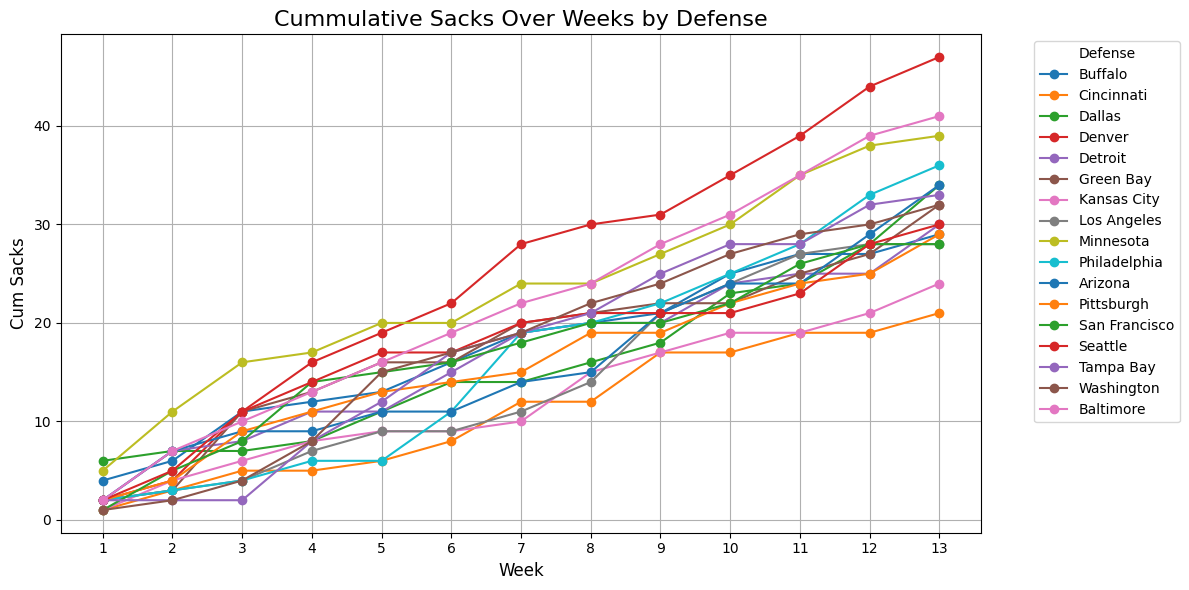

In [51]:
# Convert to a pandas DataFrame
df = pd.DataFrame(flattenedData)
df["cumSack"] = df.groupby("name")["Sack"].cumsum()
# Check the resulting DataFrame
print(df.head())
#  Pivot the DataFrame to make plotting easier
pivoted_df = df.pivot(index="week", columns="name", values="Sack")

# Plot the data
plt.figure(figsize=(12, 6))
for team in df["name"].unique():
    team_data = df[df["name"] == team]
    plt.plot(team_data["week"], team_data["cumSack"], marker="o", label=team)


# Customize the plot
plt.title("Cummulative Sacks Over Weeks by Defense", fontsize=16)
plt.xlabel("Week", fontsize=12)
plt.ylabel("Cum Sacks", fontsize=12)
plt.xticks(range(1, len(pivoted_df.index) + 1))  # Ensure all weeks are shown
plt.legend(title="Defense", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

In [52]:
#filter out for Running Backs
runningBack = [player for player in data if "RB" in player["eligible_positions"]]
flattenedData = []
for running in runningBack:
    for weekKey, weekStats in running.items():
        if weekKey.startswith("week_"):
            weekNum = int(weekKey.split("_")[1])
            if isinstance(weekStats, list) and len(weekStats) > 0:
                stats = weekStats[0]
                stats["player_id"] = running["player_id"]
                stats["name"] = running["name"]
                stats["week"] = weekNum
                flattenedData.append(stats)

   player_id            name position_type  Pass Yds  Pass TD  Int  Sack  \
0      28654  Raheem Mostert             O       0.0      0.0  0.0   0.0   
1      28654  Raheem Mostert             O       0.0      0.0  0.0   0.0   
2      28654  Raheem Mostert             O       0.0      0.0  0.0   0.0   
3      28654  Raheem Mostert             O       0.0      0.0  0.0   0.0   
4      28654  Raheem Mostert             O       0.0      0.0  0.0   0.0   

   Rush Att  Rush Yds  Rush TD  ...  40 Yd Comp  40 Yd Pass TD  40 Yd Rush  \
0       6.0       9.0      0.0  ...         0.0            0.0         0.0   
1       0.0       0.0      0.0  ...         0.0            0.0         0.0   
2       0.0       0.0      0.0  ...         0.0            0.0         0.0   
3       0.0       0.0      0.0  ...         0.0            0.0         0.0   
4      19.0      80.0      0.0  ...         0.0            0.0         0.0   

   40 Yd Rush TD  40 Yd Rec  40 Yd Rec TD  Targets  Fantasy Points  week  

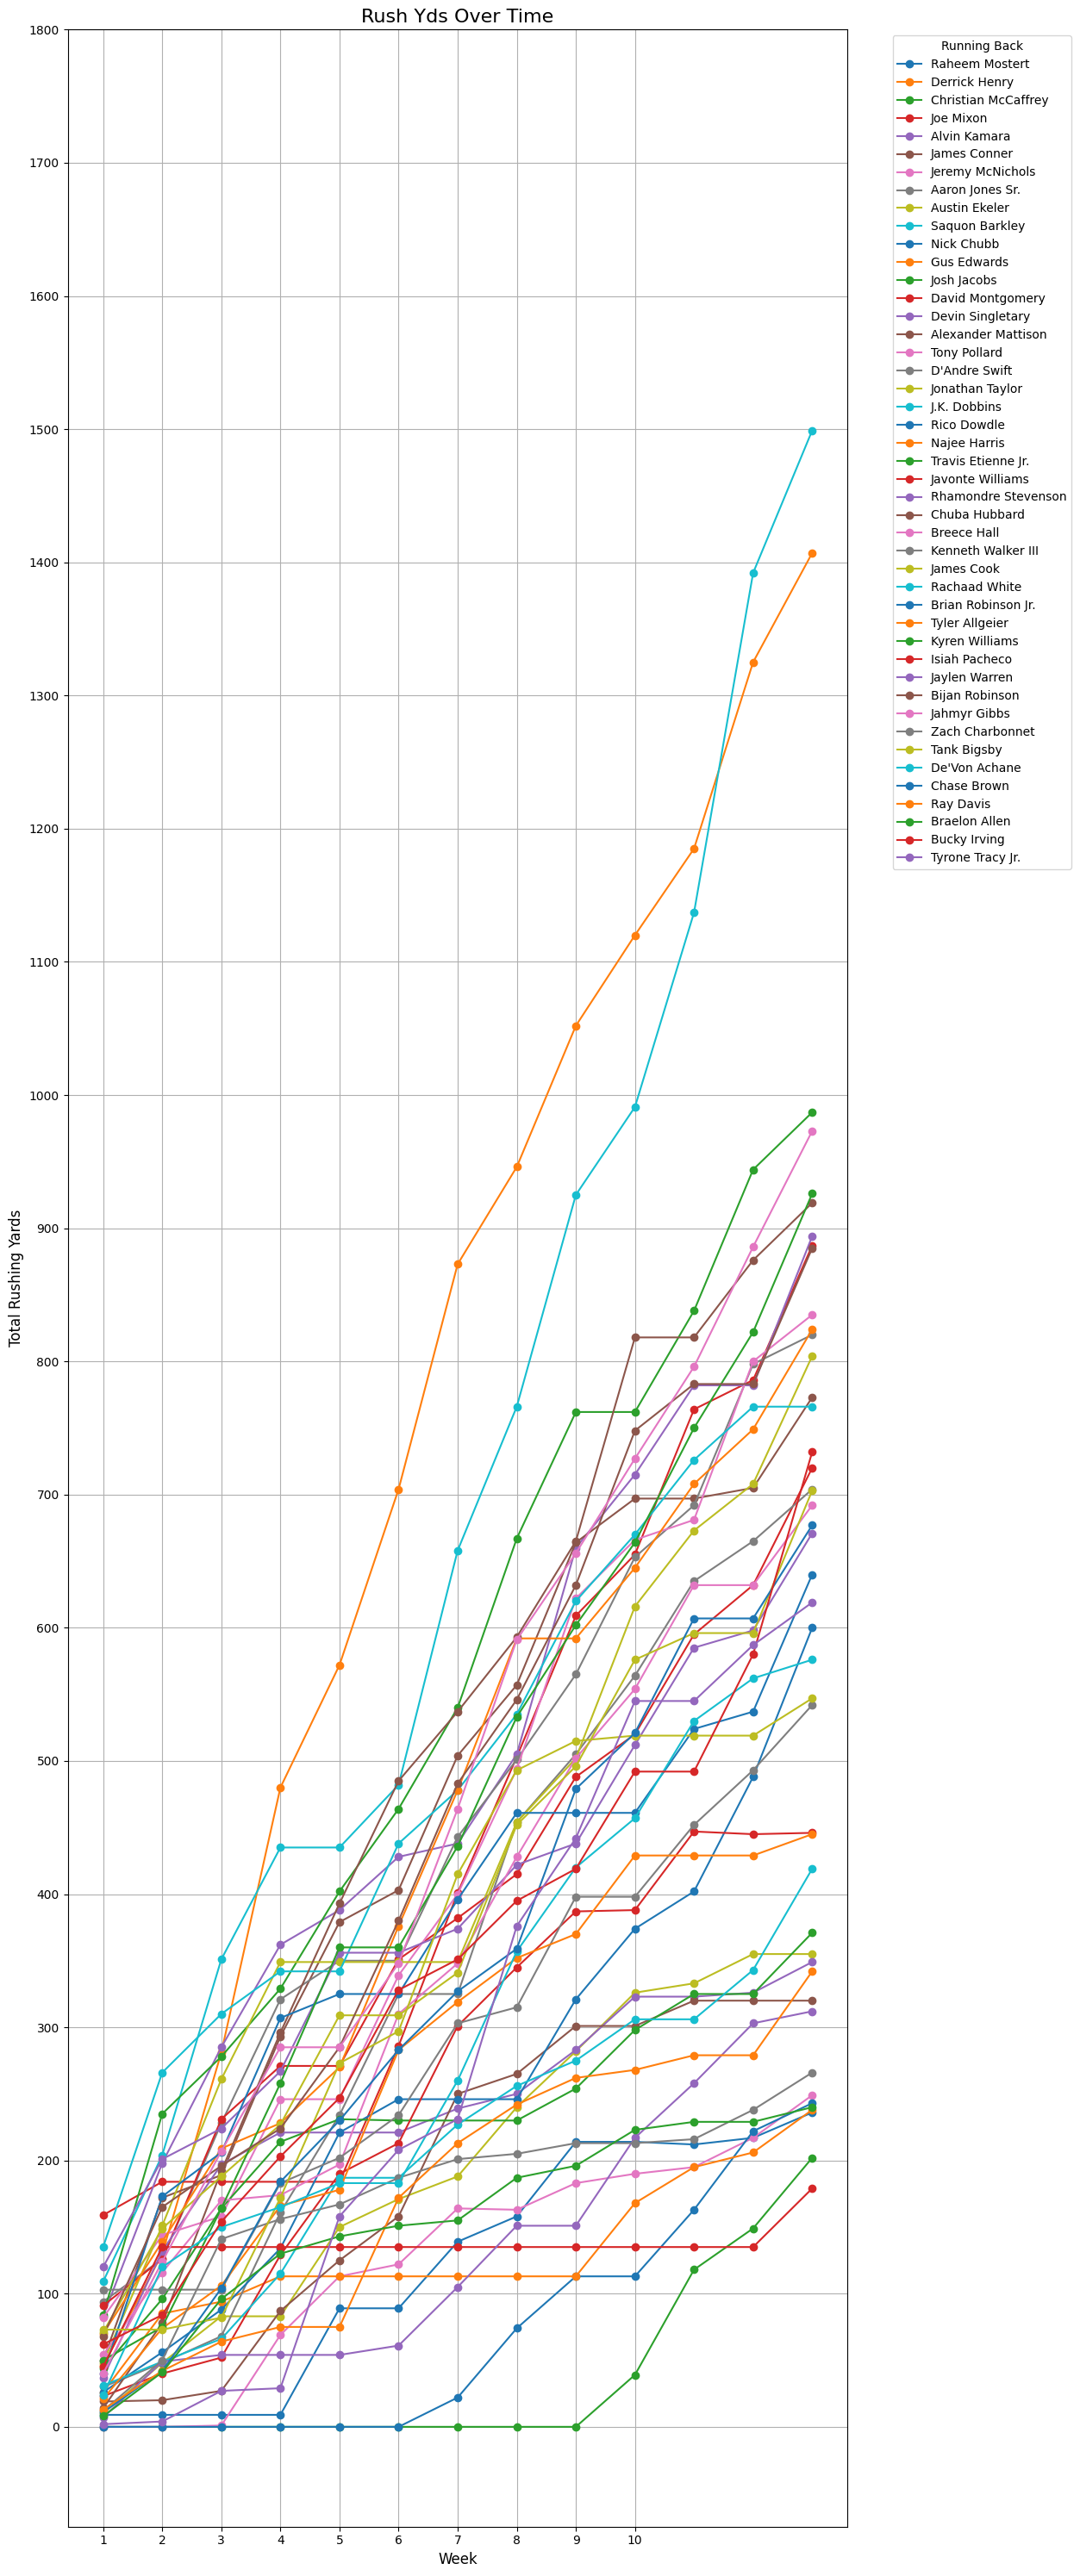

In [62]:
# Convert to a pandas DataFrame
df = pd.DataFrame(flattenedData)
df["Total Yards"] = df.groupby("name")["Rush Yds"].cumsum()
# Check the resulting DataFrame
print(df.head())
#  Pivot the DataFrame to make plotting easier
pivoted_df = df.head(10).pivot(index="week", columns="name", values="Rush Yds")

# Plot the data
plt.figure(figsize=(16, 30))
for team in df["name"].unique():
    team_data = df[df["name"] == team]
    plt.plot(team_data["week"], team_data["Total Yards"], marker="o", label=team)


# Customize the plot
plt.title("Rush Yds Over Time", fontsize=16)
plt.xlabel("Week", fontsize=12)
plt.ylabel("Total Rushing Yards", fontsize=12)
plt.xticks(range(1, len(pivoted_df.index) + 1))  # Ensure all weeks are shown
yMin = 0
yMax = 1800
plt.yticks(range(0, 1801, 100)) # Ensure all weeks are shown
plt.legend(title="Running Back", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout(rect=[0, 0, 0.8, 1])
plt.show()

TypeError: 'numpy.float64' object cannot be interpreted as an integer

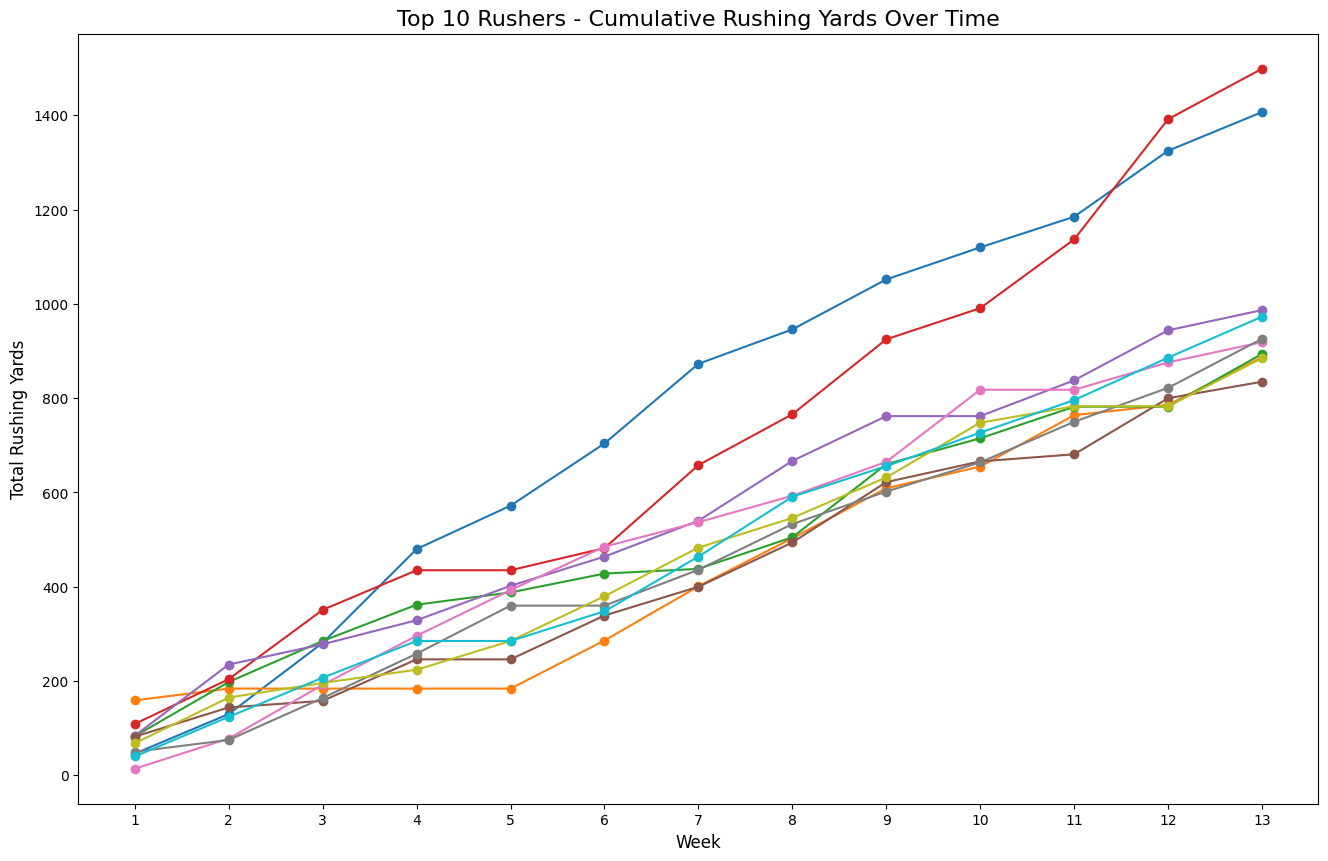

In [66]:
# Calculate total rushing yards for each player
total_yards = df.groupby("name")["Rush Yds"].sum().reset_index()

# Sort players by total yards in descending order
top_rushers = total_yards.sort_values(by="Rush Yds", ascending=False).head(10)

# Filter the original DataFrame to include only the top 10 players
top_rushers_list = top_rushers["name"].tolist()
filtered_df = df[df["name"].isin(top_rushers_list)]

# Plot the data for the top 10 rushers
plt.figure(figsize=(16, 10))
for team in filtered_df["name"].unique():
    team_data = filtered_df[filtered_df["name"] == team]
    plt.plot(team_data["week"], team_data["Total Yards"], marker="o", label=team)

# Customize the plot
plt.title("Top 10 Rushers - Cumulative Rushing Yards Over Time", fontsize=16)
plt.xlabel("Week", fontsize=12)
plt.ylabel("Total Rushing Yards", fontsize=12)
plt.xticks(range(1, len(filtered_df["week"].unique()) + 1))  # Ensure all weeks are shown
plt.yticks(range(0, filtered_df["Total Yards"].max() + 101, 100))  # Adjust y-ticks dynamically
plt.tight_layout(rect=[0, 0, 0.8, 1])
plt.legend(title="Running Back", loc="best")
plt.grid(True)

# Adjust layout to prevent cutting off the legend
plt.tight_layout(rect=[0, 0, 0.8, 1])
plt.show()

In [63]:
#  Pivot the DataFrame to make plotting easier
pivoted_df = df.pivot(index="week", columns="name", values="Yds/Carry")

# Plot the data
plt.figure(figsize=(16, 30))
for team in df["name"].unique():
    team_data = df[df["name"] == team]
    plt.plot(team_data["week"], team_data["Yds/Carry"], marker="o", label=team)


# Customize the plot
plt.title("Rush Yds Per Carry Per Week", fontsize=16)
plt.xlabel("Week", fontsize=12)
plt.ylabel("Yds Per Carry", fontsize=12)
plt.xticks(range(1, len(pivoted_df.index) + 1))  # Ensure all weeks are shown
yMin = 0
yMax = 1800
plt.yticks(range(0, 8, 1)) # Ensure all weeks are shown
plt.legend(title="Running Back", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout(rect=[0, 0, 0.8, 1])
plt.show()

KeyError: 'Yds/Carry'